# Laboratoire 1 : Premiers pas dans la résolution numérique d'équations différentielles
## MAT/GCH217 Automne 2020
## Prof : Virginie Charette
## Chargés d'exercices : Régis Koch, Kevin Thouin

____
## Le but de ce premier labo est de nous familiariser avec l'usage de Python, particulièrement le calcul symbolique (sympy) pour la résolution d'équations différentielles.

## Nous nous concentrerons sur deux aspects : 
+ dessiner le champ de directions associé à une équation différentielle
+ résoudre "symboliquement" (vs numériquement) une équation différentielle
_____

# Commençons par importer quelques bibliothèques :
+ matplotlib pour tracer des graphes
+ sympy pour pouvoir faire du calcul symbolique : en fait, nous allons plutôt importer des commandes de la bibliothèque sympy, afin d'en alléger l'écriture.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

______

# A. Champs de direction

Commençons par tracer le *champ de directions* d'une équation différentielle.  Une commande utile à cette fin est *quiver*.  Exécutez la prochaine cellule pour en savoir plus long sur la syntaxe de cette commande.

In [2]:
? plt.quiver

## Comment coder le champ de directions d'une fonction

Supposons qu'on ait l'équation différentielle suivante : 
$$\frac{dy}{dx}=f(x,y)$$
Rappelons que la pente de la tangente à une courbe $(x,y(x))$ est donnée par $y'$.

Donc le vecteur suivant est tangent à la courbe-solution $(x,y(x))$:
$$\vec{v}=\vec{i}+y'(x)\vec{j}$$

Et l'argument pour plt.quiver(X,Y,U,V) sera : X=x, Y=x, U=1, V=f(x,y). 


## Exemple

Nous allons tracer le champ de directions pour l'équation suivante:
$$\frac{dy}{dx}=ay+b$$
où $a,b$ sont des constantes quelconques.

Essayez-le avec différentes valeurs de $a,b$.

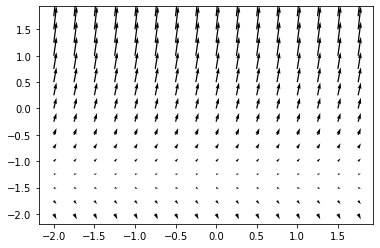

In [3]:
x=np.arange(-2,2,.25)
y=np.arange(-2,2,.25)
X,Y=np.meshgrid(x,y)

a=3
b=4

U=1
V=a*Y+b

plt.quiver(X,Y,U,V)
plt.show()

## Exercice 1. Tracer le champ de directions de l'équation différentielle suivante :
$$\frac{dy}{dx}=3-\frac{y}{10-x}$$
Choisissez vos bornes pour $x\geq 0,y\geq 0$, de manière à ce qu'on voit bien ce qui se passe.

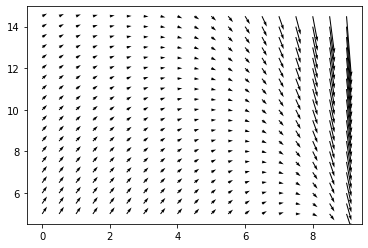

In [4]:
x=np.arange(0,9.5,.5)
y=np.arange(5,15,.5)
X,Y=np.meshgrid(x,y)

U=1
V=2-Y/(10-X)

plt.quiver(X,Y,U,V)
plt.show()

# B. La commande dsolve

La commande *dsolve* appartient à la bibliothèque sympy.  On peut lui donner n'importe quelle équation différentielle pouvant être résolue analytiquement (c'est-à-dire symboliquement, ou à la main) et sympy connaît la solution.

Puisqu'on fait du calcul symbolique, il faut déclarer tous nos symboles et fonctions.

In [5]:
from sympy import Symbol,dsolve,Function,Derivative,Eq,solve

y=Function("y")
x=Symbol("x")

y_=Derivative(y(x),x)

Notons que *Derivative* retourne une fonction symbolique, tout comme *y*  

La commande *dsolve* prend une équation différentielle, donnée avec la commande *Eq*, et retourne une équation $y(x)=$ solution.

Par exemple, utilisons *dsolve* pour résoudre :
$$\frac{dy}{dx}=-5y$$

In [29]:
dsolve(Eq(y_+5*y(x),0),y(x),ics={y(0):1})

Eq(y(x), exp(-5*x))

On utilise *.rhs* si on veut seulement la valeur de la solution :

In [18]:
dsolve(Eq(y_+5*y(x),0),y(x)).rhs

C1*exp(-5*x)

## Exercice 2. Trouvez la solution de l'équation différentielle :

$$\frac{dy}{dx}=3-\frac{y}{10-x}$$


In [6]:
dsolve(Eq(y_-3+y(x)/(10-x),0),y(x))

Eq(y(x), C1*x - 10*C1 + 3*x*log(x - 10) - 30*log(x - 10))

# C. Conditions initiales

Par défaut, sympy utilisera C1, C2, etc. pour dénoter les constantes arbitraires.

On peut utiliser la commande *solve* pour trouver la valeur de C1 déterminée par la condition initiale.

Prenons par exemple l'équation différentielle suivante :
$$\frac{dy}{dx}+y^2\sin x=0,\quad y(0)=1$$

In [7]:
from sympy import sin
s1=dsolve(Eq(y_+sin(x)*y(x)**2,0),y(x))
s1

Eq(y(x), -1/(C1 + cos(x)))

In [12]:
s1.rhs

-1/(C1 + cos(x))

Nous utiliserons la commande *solve* pour trouver C1 satisfaisant la condition initiale $y(0)=1$.

In [8]:
C1=Symbol("C1")

val_init=s1.rhs.subs(x,0)-1
const=solve(val_init,C1)
s1.subs(C1,const[0])

Eq(y(x), -1/(cos(x) - 2))

In [9]:
const

[-2]

## Exercice 3. Trouvez la solution de l'équations différentielle suivante :
$$y'=x^2/y,\quad y(1)=2$$

*attention! Il y a deux solutions possibles avant d'imposer la condition initiale!*

In [31]:
s1=dsolve(Eq(y_-x**2/y(x),0),y(x),ics={y(1):2})
s1

Eq(y(x), sqrt(6*x**3 + 30)/3)

In [19]:
C1=Symbol("C1")
S1=s1[1]
val_init=S1.rhs.subs(x,1)-2
const=solve(val_init,C1)
S1.subs(C1,const[0])

Eq(y(x), sqrt(6*x**3 + 30)/3)

## Exercice 4. Trouvez la solution de l'équation différentielle suivante :
$$\frac{dy}{dx}=3-\frac{y}{10-x},\quad y(0)=1$$

## Tracez la courbe solution sur le champ de directions trouvé à l'exercice 1.

In [20]:
s1=dsolve(Eq(y_-3+y(x)/(10-x),0),y(x))
s1

Eq(y(x), C1*x - 10*C1 + 3*x*log(x - 10) - 30*log(x - 10))

In [21]:
10*C1-30*np.log(10)-1

10*C1 - 70.0775527898214

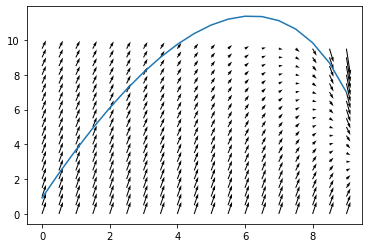

In [46]:
x=np.arange(0,9.5,.5)
y=np.arange(0,10,.5)
X,Y=np.meshgrid(x,y)

U=1
V=3-Y/(10-x)

plt.quiver(X,Y,U,V)

plt.plot(x,-7*(x-10)+3*x*np.log(10-x)-30*np.log(10-x))
plt.show()

# D. Solutions implicites vs solutions explicites

Nous avons vu plusieurs exemples d'équations différentielles dont la solution est à laisser sous forme implicite.

Prenons par exemple l'équation suivante :
$$\frac{dy}{dx}=\frac{y(1-x)}{x(3-y)},\quad y(1)=1$$
Cette équation se résoud par séparation de variables et on a (vérifiez-le!) :
$$3\ln(y)-y-\ln(x)+x=0$$

Tracer la courbe-solution se fait avec la commande *plot_implicit*.  Par exemple, pour tracer le cercle $x^2+y^2=3$ :

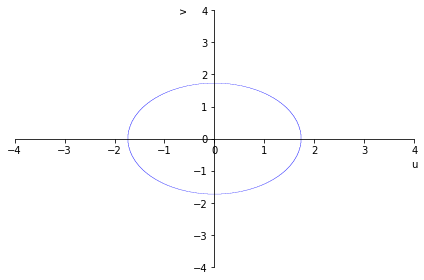

In [10]:
from sympy import plot_implicit 
u=Symbol("u") 
v=Symbol("v")

plot_implicit(Eq(u**2+v**2,3),(u,-4,4),(v,-4,4))

## Exercice 4.  Tracez la courbe :
$$3\ln(y)-y-\ln(x)+x=0$$

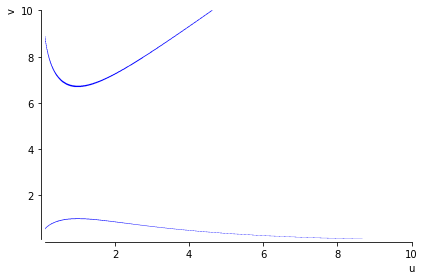

In [24]:
from sympy import plot_implicit 
from sympy import log
u=Symbol("u") 
v=Symbol("v")

plot_implicit(Eq(3*log(v)-v-log(u)+u,0),(u,0.1,10),(v,0.1,10))

## Utiliser dsolve pour des solutions implicites

Maintenant, sympy connaît toutes sortes de fonctions... et aura donc des réponses parfois étonnantes.

Par exemple, si on lui demande de résoudre l'équation :
$$\frac{dy}{dx}=\frac{y(1-x)}{x(3-y)}$$

voici ce que dsolve répond :

In [22]:
y=Function("y")
x=Symbol("x")

y_=Derivative(y(x),x)

dsolve(Eq(y_-y(x)*(1-x)/(x*(3-y(x))),0),y(x))

[Eq(y(x), -3*LambertW(-(C1*x*exp(-x))**(1/3)/3)),
 Eq(y(x), -3*LambertW((C1*x*exp(-x))**(1/3)*(1 - sqrt(3)*I)/6)),
 Eq(y(x), -3*LambertW((C1*x*exp(-x))**(1/3)*(1 + sqrt(3)*I)/6))]

La fonction *LambertW* est définie comme la fonction inverse de $xe^x$.  Autrement dit :
$$\mbox{LambertW}(xe^x)=x$$